# Ford Gobike Bike Sharing Data Analysis
## by Abdelrahman Mohsen

## Investigation Overview

In this investigation, i was interested in understand the behavioural differences between men and women, i foucsed on the age, trip duration and trip period as the most related features to my investigation.

## Dataset Overview

Our dataset contains more than 13 thousand rows and 16 attributes of bike sharing system like trip duration, station name et.. As shown in the above cell we can see that the structure of the dataset need some modifications, the time need to be converted to datetime, also build a new column for age that can be got from birth year

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [76]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('tripdata.csv')

In [77]:
#keep only feamle or male in gender column
df = df.loc[df["member_gender"] != 'Other']

# convert the Start Time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# extract year, month and hour from Start Time to create new columns
df['year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month
df['start_hour'] = df['start_time'].dt.hour

# convert the Start Time column to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

# extract year, month and hour from Start Time to create new columns
df['end_year'] = df['end_time'].dt.year
df['end_month'] = df['end_time'].dt.month
df['end_hour'] = df['end_time'].dt.hour

#convert duration to minutes
df['duration']=df['duration_sec']/60
df.drop(columns='duration_sec',inplace=True)

#calculate member age
df['member_age'] = df['year'] - df['member_birth_year']

# remove Nan values in gender and age
df.dropna(subset=['member_gender','member_age'],inplace=True)

# create day period column 
df['period'] = 'Morning'
df['period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'Afternoon'
df['period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'Night'

## Which type of gender ride bikes more?

It's clear that no. of males is triple the no. of females,this is expected but also the no. of females is quite high. 

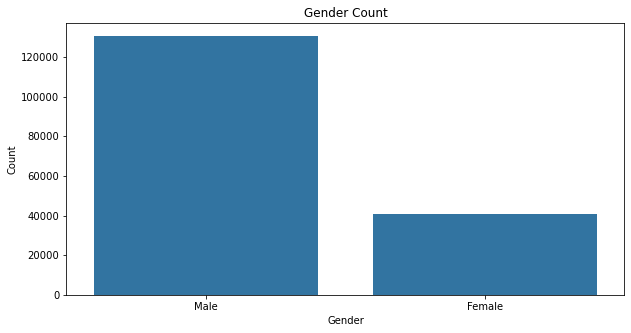

In [78]:
#look at gender distribution
plt.figure(figsize=(10,5))
ax = sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

## How gender affect the ride duration?

Very intersting to find out that many women have rides that exceed duration of 13 hours, this indicates that gender is not a barrier to doing activities that require high stamina or physical strength

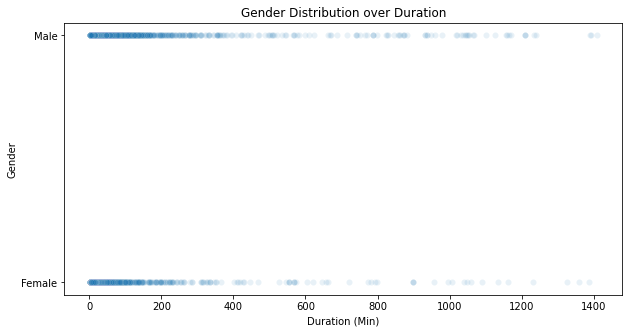

In [79]:
#plot relation between gender and duration
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, y='member_gender', x='duration', alpha = 0.1)
plt.xlabel('Duration (Min)')
plt.ylabel('Gender')
plt.title('Gender Distribution over Duration')
plt.show()

## How age of each gender affect the trip duration?

As shown in the figure the range of male ages that ride for long time is higher than female, you can find 50 years man who ride a bike for 900 minute. For women the range of ages that take long rides are between 25 and 35, in other hand the rande for men is wider and between 25 and 55, this means that men are more likely to perserve physical strength while they get old.

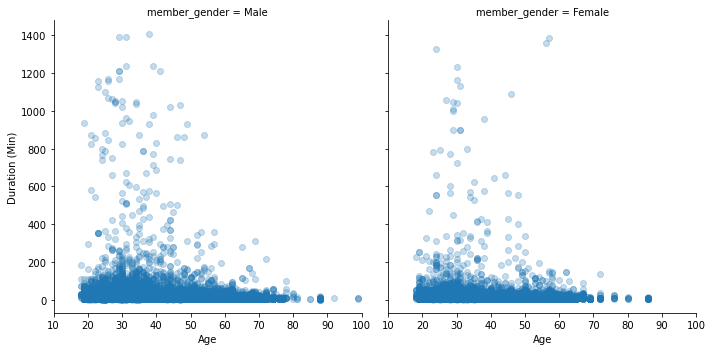

In [80]:
genders = sb.FacetGrid(data = df, col = 'member_gender',size=5, xlim = [10, 100])
ax= genders.map(plt.scatter, 'member_age', 'duration', alpha=0.25)
genders.set_xlabels('Age')
genders.set_ylabels('Duration (Min)')
plt.show()

In [81]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    height: 100% !important;
    width: 100% !important;
}
</style>
""")

In [82]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input 

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 364292 bytes to slide_deck.slides.html
